In [2]:
import os

sample_xml_file = "/Users/sangeun/Documents/AD_first_meta"
xml_files = sorted([f for f in os.listdir(sample_xml_file) if f.endswith(".xml")])

if xml_files:
    sample_file_path = os.path.join(sample_xml_file, xml_files[0])
    with open(sample_file_path, "r", encoding="utf-8") as file:
        sample_content = file.readlines()
        print("".join(sample_content[:20]))
else:
    print("No XML files found.")

<?xml version="1.0" encoding="UTF-8"?>
<idaxs xmlns="http://ida.loni.usc.edu" 
       xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xsi:schemaLocation="/xsds/idaxs_2_0.xsd">
<project xmlns="">
 <projectIdentifier>ADNI</projectIdentifier>
 <projectDescription>Alzheimer&#039;s Disease Neuroimaging Initiative</projectDescription>
 <siteKey>002</siteKey>
 <subject>
  <subjectIdentifier>002_S_0619</subjectIdentifier>
  <researchGroup>AD</researchGroup>
  <subjectSex>M</subjectSex>
  <subjectInfo item="APOE A1">4</subjectInfo>
  <subjectInfo item="APOE A2">4</subjectInfo>
  <visit>
   <visitIdentifier>ADNI Screening</visitIdentifier>
   <assessment name="MMSE">
    <component name="MMSE Total Score">
     <assessmentScore attribute="MMSCORE">22.0</assessmentScore>
    </component>



In [4]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

ad_metadata_path = "/Users/sangeun/Documents/AD_first_meta"
cn_metadata_path = "/Users/sangeun/Documents/CN_first_meta"

# Function to extract XML data and save as CSV
def convert_xml_to_csv(folder_path, output_csv):
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return

    xml_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".xml")])

    if not xml_files:
        print(f"No XML files found in {folder_path}")
        return

    all_data = []

    for xml_file in xml_files:
        file_path = os.path.join(folder_path, xml_file)

        try:
            tree = ET.parse(file_path)
            root = tree.getroot()

            record = {}

            for elem in root.iter():
                if elem.tag not in record:
                    record[elem.tag] = elem.text.strip() if elem.text else "N/A"

            all_data.append(record)

        except Exception as e:
            print(f"Error parsing {xml_file}: {e}")

    if all_data:
        df = pd.DataFrame(all_data)
        df.to_csv(output_csv, index=False)
        print(f"Saved: {output_csv}")
        print(df.head())

    else:
        print(f"No data extracted from XML files in {folder_path}")

ad_csv_path = "/Users/sangeun/Documents/AD_first_meta.csv"
cn_csv_path = "/Users/sangeun/Documents/CN_first_meta.csv"

convert_xml_to_csv(ad_metadata_path, ad_csv_path)
convert_xml_to_csv(cn_metadata_path, cn_csv_path)

Saved: /Users/sangeun/Documents/AD_first_meta.csv
  {http://ida.loni.usc.edu}idaxs project projectIdentifier  \
0                                                     ADNI   
1                                                     ADNI   
2                                                     ADNI   
3                                                     ADNI   
4                                                     ADNI   

                            projectDescription siteKey subject  \
0  Alzheimer's Disease Neuroimaging Initiative     002           
1  Alzheimer's Disease Neuroimaging Initiative     002           
2  Alzheimer's Disease Neuroimaging Initiative     002           
3  Alzheimer's Disease Neuroimaging Initiative     002           
4  Alzheimer's Disease Neuroimaging Initiative     002           

  subjectIdentifier researchGroup subjectSex subjectInfo  ... imageRating  \
0        002_S_0619            AD          M           4  ...               
1        002_S_0619       

In [6]:
import pandas as pd

csv_path_AD = "/Users/sangeun/Documents/AD_first_meta.csv"
csv_path_CN = "/Users/sangeun/Documents/CN_first_meta.csv"

# Load the CSV into a DataFrame
meta_AD = pd.read_csv(csv_path_AD)
meta_CN = pd.read_csv(csv_path_CN)

meta_AD.head()

,{http://ida.loni.usc.edu}idaxs,project,projectIdentifier,projectDescription,siteKey,subject,subjectIdentifier,researchGroup,subjectSex,subjectInfo,...,imageRating,ratingDescription,value,relatedImageDetail,originalRelatedImage,description,protocolTerm,protocol,programParams,processingInstitution
0,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0619,AD,M,4,...,NaN,1.0,1.0,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,NaN
1,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0619,AD,M,4,...,NaN,1.0,1.0,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,NaN
2,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0619,AD,M,4,...,NaN,1.0,1.0,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,NaN
3,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0619,AD,M,4,...,NaN,1.0,1.0,NaN,NaN,MP-RAGE REPEAT,NaN,3D,"scale=1.003083,1,1.008307",NaN
4,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0619,AD,M,4,...,NaN,1.0,1.0,NaN,NaN,MP-RAGE REPEAT,NaN,3D,"scale=1.003083,1.008205,1.008307",NaN


In [8]:
meta_AD.shape

(1638, 58)

In [10]:
meta_CN.head()

,{http://ida.loni.usc.edu}idaxs,project,projectIdentifier,projectDescription,siteKey,subject,subjectIdentifier,researchGroup,subjectSex,subjectInfo,...,relatedImageDetail,originalRelatedImage,description,protocolTerm,protocol,imageRating,ratingDescription,value,programVersion,platform
0,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0295,CN,M,3.0,...,NaN,NaN,MP-RAGE,NaN,3D,NaN,1.0,1.0,NaN,NaN
1,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0295,CN,M,3.0,...,NaN,NaN,MP-RAGE,NaN,3D,NaN,1.0,1.0,5.1.0,NaN
2,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0295,CN,M,3.0,...,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,1.0,1.0,0.2,Linux
3,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0295,CN,M,3.0,...,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,1.0,1.0,0.2,Linux
4,NaN,NaN,ADNI,Alzheimer's Disease Neuroimaging Initiative,2,NaN,002_S_0295,CN,M,3.0,...,NaN,NaN,MP-RAGE REPEAT,NaN,3D,NaN,1.0,1.0,0.2,Linux


In [12]:
meta_CN.shape

(1914, 58)

In [14]:
!pip install nibabel

Found 1638 NIfTI files.

Loading file 1: /Users/sangeun/Documents/AD_first/062_S_0690/MPR__GradWarp/2006-07-18_10_19_47.0/I50470/ADNI_062_S_0690_MR_MPR__GradWarp_Br_20070424115450866_S16924_I50470.nii


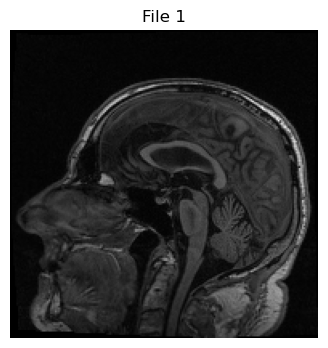


Loading file 2: /Users/sangeun/Documents/AD_first/062_S_0690/MPR__GradWarp__B1_Correction/2006-07-18_10_19_47.0/I50469/ADNI_062_S_0690_MR_MPR__GradWarp__B1_Correction_Br_20070424115410875_S16924_I50469.nii


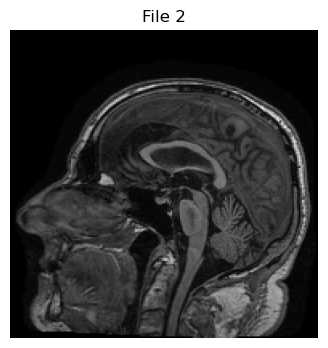


Loading file 3: /Users/sangeun/Documents/AD_first/062_S_0690/MPR-R__GradWarp__B1_Correction__N3/2006-07-18_10_28_00.0/I50472/ADNI_062_S_0690_MR_MPR-R__GradWarp__B1_Correction__N3_Br_20070424115616838_S16923_I50472.nii


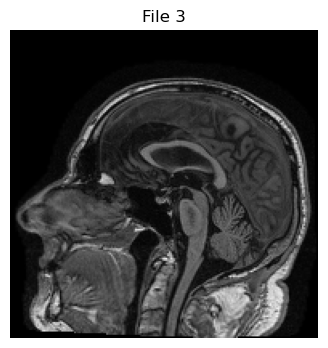


Loading file 4: /Users/sangeun/Documents/AD_first/062_S_0690/MPR__GradWarp__B1_Correction__N3/2006-07-18_10_19_47.0/I50467/ADNI_062_S_0690_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424115243884_S16924_I50467.nii


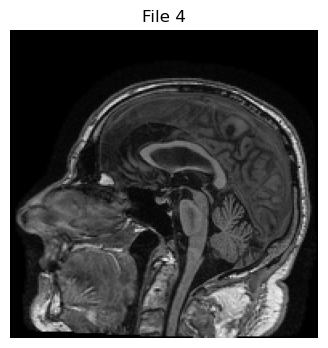


Loading file 5: /Users/sangeun/Documents/AD_first/062_S_0690/MPR-R__GradWarp/2006-07-18_10_28_00.0/I50474/ADNI_062_S_0690_MR_MPR-R__GradWarp_Br_20070424115748785_S16923_I50474.nii


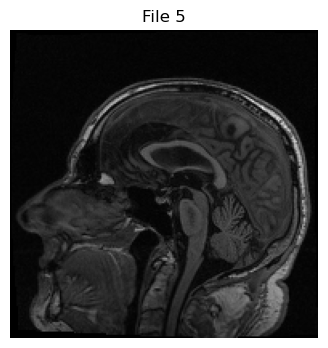

In [16]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

# Set the root path to your NIfTI folder
root_dir = "/Users/sangeun/Documents/AD_first"

# Find all .nii files recursively
nii_files = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    for file in filenames:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            nii_files.append(os.path.join(dirpath, file))

# Show how many files found
print(f"Found {len(nii_files)} NIfTI files.")

# Load and display a few of them
for i, file_path in enumerate(nii_files[:5]):
    print(f"\nLoading file {i+1}: {file_path}")
    img = nib.load(file_path)
    data = img.get_fdata()

    # Display the central slice from the middle of the volume
    mid_slice = data.shape[2] // 2
    plt.figure(figsize=(4, 4))
    plt.imshow(data[:, :, mid_slice], cmap='gray')
    plt.title(f"File {i+1}")
    plt.axis('off')
    plt.show()

In [56]:
import os
import numpy as np
import nibabel as nib
from tqdm import tqdm
from scipy.ndimage import zoom
import re

input_dirs = {
    "AD": "/Users/sangeun/Documents/AD_first",
    "CN": "/Users/sangeun/Documents/CN_first"
}

# Output base folder
output_base = "/Users/sangeun/Documents/preprocessed_npy"
os.makedirs(output_base, exist_ok=True)

# Target shape for all volumes
target_shape = (128, 128, 128)

def normalize_volume(volume):
    volume = volume.astype(np.float32)
    volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume) + 1e-8)
    return volume

def resize_volume(volume, target_shape):
    factors = [t / s for t, s in zip(target_shape, volume.shape)]
    return zoom(volume, factors, order=1)

def extract_subject_id(path):
    match = re.search(r'ADNI_\d{3}_S_\d{4}', path)
    if match:
        return match.group(0)
    else:
        return os.path.splitext(os.path.basename(path))[0]

# Loop through both AD and CN
for label, base_dir in input_dirs.items():
    output_dir = os.path.join(output_base, f"{label}_first_npy")
    os.makedirs(output_dir, exist_ok=True)

    nii_files = []
    for dirpath, _, filenames in os.walk(base_dir):
        for file in filenames:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                full_path = os.path.join(dirpath, file)
                nii_files.append(full_path)

    print(f"\nFound {len(nii_files)} NIfTI files in {label}")

    for file_path in tqdm(nii_files, desc=f"Processing {label}"):
        try:
            # Load MRI
            img = nib.load(file_path)
            data = img.get_fdata()

            # Normalize and resize
            data = normalize_volume(data)
            data = resize_volume(data, target_shape)

            # Extract subject ID from folder or filename
            subject_id = extract_subject_id(file_path)

            # Save as .npy
            filename = f"{label}_{subject_id}.npy"
            save_path = os.path.join(output_dir, filename)
            np.save(save_path, data)
        except Exception as e:
            print(f"Failed to process {file_path}: {e}")


Found 1638 NIfTI files in AD


Processing AD: 100%|██████████| 1638/1638 [04:18<00:00,  6.35it/s]



Found 1914 NIfTI files in CN


Processing CN:  56%|█████▌    | 1071/1914 [02:51<02:46,  5.05it/s]

Failed to process /Users/sangeun/Documents/CN_first/012_S_0637/EPI_current_corrected_image/2006-06-16_08_01_18.0/I437890/ADNI_021_S_5099_MR_EPI_current_corrected_image_Br_20140731165858191_S16022_I437890.nii: sequence argument must have length equal to input rank


Processing CN: 100%|██████████| 1914/1914 [04:59<00:00,  6.39it/s]


In [18]:
import os
import pandas as pd

base_path = "/Users/sangeun/Documents/preprocessed_npy"

# Collect records
records = []
for label in ["AD", "CN"]:
    folder = os.path.join(base_path, f"{label}_first_npy")
    for fname in os.listdir(folder):
        if fname.endswith(".npy"):
            subject_id = fname.split("ADNI_")[1].replace(".npy", "")
            records.append({
                "MRI_Path": os.path.join(folder, fname),
                "SubjectID": subject_id,
                "Label": label,
                "LabelEncoded": 1 if label == "AD" else 0
            })

df = pd.DataFrame(records)
print(f"Total MRI samples: {len(df)}")
df.head()

Total MRI samples: 3942


,MRI_Path,SubjectID,Label,LabelEncoded
0,/Users/sangeun/Documents/preprocessed_npy/AD_f...,024_S_1307_MR_MPR-R__GradWarp__B1_Correction__...,AD,1
1,/Users/sangeun/Documents/preprocessed_npy/AD_f...,027_S_0404_MR_MPR__GradWarp__B1_Correction__N3...,AD,1
2,/Users/sangeun/Documents/preprocessed_npy/AD_f...,023_S_1262_MR_MPR__GradWarp__B1_Correction__Ma...,AD,1
3,/Users/sangeun/Documents/preprocessed_npy/AD_f...,141_S_1152_MR_MPR-R__GradWarp__B1_Correction_B...,AD,1
4,/Users/sangeun/Documents/preprocessed_npy/AD_f...,062_S_0690_MR_MPR__GradWarp__B1_Correction__N3...,AD,1


In [20]:
from sklearn.model_selection import train_test_split

# Split by unique subjects to avoid data leakage
train_ids, test_ids = train_test_split(
    df['SubjectID'].unique(),
    test_size=0.2,
    stratify=df['LabelEncoded'],
    random_state=42
)

# Build split DataFrames
train_df = df[df['SubjectID'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['SubjectID'].isin(test_ids)].reset_index(drop=True)

print(f"Train: {len(train_df)}, Test: {len(test_df)}")

Train: 3153, Test: 789


In [22]:
import torch
from torch.utils.data import Dataset
import numpy as np

class MRIDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        volume = np.load(row['MRI_Path'])  # shape: (128, 128, 128)
        volume = volume[np.newaxis, ...]   # Add channel dim → shape: (1, 128, 128, 128)
        label = row['LabelEncoded']
        return torch.tensor(volume, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [24]:
from torch.utils.data import DataLoader

train_dataset = MRIDataset(train_df)
test_dataset = MRIDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4)

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(32 * 32 * 32 * 32, 128)  
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [ ]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Simple3DCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", unit="batch")
    
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()

        # Update live metrics in the tqdm bar
        loop.set_postfix(loss=loss.item(), accuracy=100 * correct / total)

    acc = correct / total * 100
    print(f"Epoch {epoch+1}: Loss = {running_loss:.4f}, Accuracy = {acc:.2f}%")

Epoch 1:  46%|████▌     | 361/789 [08:31<10:23,  1.46s/batch, accuracy=56.9, loss=0.533]

In [ ]:
torch.save(model.state_dict(), "simple3dcnn_model.pth")
print("Model saved.")

In [20]:
model.eval()

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():  # No gradient needed during evaluation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 98.61%


Classification Report:
              precision    recall  f1-score   support

          CN       0.99      0.99      0.99       426
          AD       0.99      0.98      0.98       363

    accuracy                           0.99       789
   macro avg       0.99      0.99      0.99       789
weighted avg       0.99      0.99      0.99       789



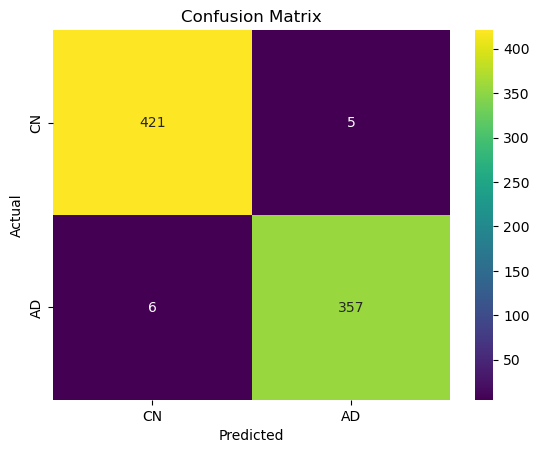

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["CN", "AD"]))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["CN", "AD"], yticklabels=["CN", "AD"],cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import numpy as np
import pandas as pd
from tqdm import tqdm

In [28]:
# Rename to match expected column names
train_df = train_df.rename(columns={"MRI_Path": "path", "LabelEncoded": "label"})
test_df = test_df.rename(columns={"MRI_Path": "path", "LabelEncoded": "label"})

In [30]:
class MRIDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        path = self.dataframe.loc[idx, "path"]
        label = int(self.dataframe.loc[idx, "label"])

        volume = np.load(path).astype(np.float32)
        volume = (volume - volume.min()) / (volume.max() - volume.min() + 1e-5)
        volume_tensor = torch.tensor(volume).unsqueeze(0)  # (1, D, H, W)

        # Downsample to (64, 64, 64)
        volume_tensor = F.interpolate(volume_tensor.unsqueeze(0), size=(64, 64, 64), mode='trilinear', align_corners=False).squeeze(0)

        return volume_tensor, label

In [36]:
class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(32 * 16 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class VGG3D(nn.Module):
    def __init__(self):
        super(VGG3D, self).__init__()
        self.features = nn.Sequential(
            nn.Conv3d(1, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
            nn.Conv3d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
            nn.Conv3d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool3d(2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 8 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class ResNetBlock3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm3d(out_channels)
        self.conv2 = nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm3d(out_channels)
        self.shortcut = nn.Conv3d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class ResNet3D(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = ResNetBlock3D(1, 32)
        self.pool = nn.MaxPool3d(2)
        self.layer2 = ResNetBlock3D(32, 64)
        self.layer3 = ResNetBlock3D(64, 128)
        self.fc = nn.Sequential(
            nn.Linear(128 * 8 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.pool(self.layer1(x))
        x = self.pool(self.layer2(x))
        x = self.pool(self.layer3(x))
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Use full datasets
train_dataset = MRIDataset(train_df)
test_dataset = MRIDataset(test_df)

# Set batch size
BATCH_SIZE = 4

# Full DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Model dictionary
model_classes = {
    "Simple3DCNN": Simple3DCNN,
    "VGG3D": VGG3D,
    "ResNet3D": ResNet3D
}

EPOCHS = 7
best_accuracy = 0
best_model_name = None
best_model_state = None

for model_name, ModelClass in model_classes.items():
    print(f"\nTraining {model_name}")
    model = ModelClass().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(EPOCHS):
        model.train()
        correct, total, running_loss = 0, 0, 0.0

        for inputs, labels in tqdm(train_loader, desc=f"{model_name} Epoch {epoch+1}/{EPOCHS}"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)

        acc = 100 * correct / total
        print(f"Epoch {epoch+1} | Loss: {running_loss:.4f} | Train Acc: {acc:.2f}%")

    # Save trained model
    torch.save(model.state_dict(), f"{model_name}_model.pth")
    print(f"Saved {model_name}_model.pth")

    # Evaluate on test set
    model.eval()
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = outputs.argmax(dim=1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_acc = 100 * correct_test / total_test
    print(f"{model_name} Test Accuracy: {test_acc:.2f}%")

    # Save best model
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model_name = model_name
        best_model_state = model.state_dict()

# Save best model separately
torch.save(best_model_state, "best_model.pth")
print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_accuracy:.2f}%")
print("Best model saved as best_model.pth")

Using device: cpu

Training Simple3DCNN


Simple3DCNN Epoch 1/7: 100%|██████████| 789/789 [02:13<00:00,  5.89it/s]


Epoch 1 | Loss: 540.7312 | Train Acc: 54.87%


Simple3DCNN Epoch 2/7: 100%|██████████| 789/789 [02:09<00:00,  6.11it/s]


Epoch 2 | Loss: 497.3999 | Train Acc: 64.07%


Simple3DCNN Epoch 3/7: 100%|██████████| 789/789 [02:16<00:00,  5.80it/s]


Epoch 3 | Loss: 408.3124 | Train Acc: 74.37%


Simple3DCNN Epoch 4/7: 100%|██████████| 789/789 [02:08<00:00,  6.14it/s]


Epoch 4 | Loss: 285.9985 | Train Acc: 84.08%


Simple3DCNN Epoch 5/7: 100%|██████████| 789/789 [02:08<00:00,  6.13it/s]


Epoch 5 | Loss: 195.7085 | Train Acc: 89.22%


Simple3DCNN Epoch 6/7: 100%|██████████| 789/789 [02:09<00:00,  6.11it/s]


Epoch 6 | Loss: 146.9993 | Train Acc: 92.17%


Simple3DCNN Epoch 7/7: 100%|██████████| 789/789 [02:09<00:00,  6.09it/s]


Epoch 7 | Loss: 118.6590 | Train Acc: 92.39%
Saved Simple3DCNN_model.pth
Simple3DCNN Test Accuracy: 91.89%

Training VGG3D


VGG3D Epoch 1/7: 100%|██████████| 789/789 [04:38<00:00,  2.83it/s]


Epoch 1 | Loss: 546.6854 | Train Acc: 53.19%


VGG3D Epoch 2/7: 100%|██████████| 789/789 [04:36<00:00,  2.85it/s]


Epoch 2 | Loss: 545.6502 | Train Acc: 53.79%


VGG3D Epoch 3/7: 100%|██████████| 789/789 [04:37<00:00,  2.84it/s]


Epoch 3 | Loss: 541.1211 | Train Acc: 54.04%


VGG3D Epoch 4/7: 100%|██████████| 789/789 [04:37<00:00,  2.85it/s]


Epoch 4 | Loss: 521.0142 | Train Acc: 58.77%


VGG3D Epoch 5/7: 100%|██████████| 789/789 [04:36<00:00,  2.85it/s]


Epoch 5 | Loss: 446.0977 | Train Acc: 69.68%


VGG3D Epoch 6/7: 100%|██████████| 789/789 [04:36<00:00,  2.85it/s]


Epoch 6 | Loss: 305.5297 | Train Acc: 80.69%


VGG3D Epoch 7/7: 100%|██████████| 789/789 [04:37<00:00,  2.84it/s]


Epoch 7 | Loss: 187.5569 | Train Acc: 88.65%
Saved VGG3D_model.pth
VGG3D Test Accuracy: 90.62%

Training ResNet3D


ResNet3D Epoch 1/7: 100%|██████████| 789/789 [32:45<00:00,  2.49s/it]


Epoch 1 | Loss: 590.7634 | Train Acc: 53.60%


ResNet3D Epoch 2/7: 100%|██████████| 789/789 [32:57<00:00,  2.51s/it]


Epoch 2 | Loss: 520.2679 | Train Acc: 59.78%


ResNet3D Epoch 3/7: 100%|██████████| 789/789 [32:34<00:00,  2.48s/it]


Epoch 3 | Loss: 453.1263 | Train Acc: 68.13%


ResNet3D Epoch 4/7: 100%|██████████| 789/789 [32:33<00:00,  2.48s/it]


Epoch 4 | Loss: 330.4650 | Train Acc: 77.04%


ResNet3D Epoch 5/7: 100%|██████████| 789/789 [32:34<00:00,  2.48s/it]


Epoch 5 | Loss: 226.6452 | Train Acc: 83.63%


ResNet3D Epoch 6/7: 100%|██████████| 789/789 [32:34<00:00,  2.48s/it]


Epoch 6 | Loss: 160.9162 | Train Acc: 86.74%


ResNet3D Epoch 7/7: 100%|██████████| 789/789 [32:37<00:00,  2.48s/it]


Epoch 7 | Loss: 143.9532 | Train Acc: 87.00%
Saved ResNet3D_model.pth
ResNet3D Test Accuracy: 87.20%

Best Model: Simple3DCNN with Test Accuracy: 91.89%
Best model saved as best_model.pth


In [32]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from glob import glob

In [34]:
class MRIDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        data = np.load(self.file_paths[idx])
        data = (data - np.mean(data)) / np.std(data)  # Normalize
        data = np.expand_dims(data, axis=0).astype(np.float32)
        label = self.labels[idx]
        return torch.tensor(data), torch.tensor(label)

In [36]:
class Simple3DCNN_GradCam(nn.Module):
    def __init__(self):
        super(Simple3DCNN_GradCam, self).__init__()
        self.conv1 = nn.Conv3d(1, 8, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool3d(2)
        self.conv2 = nn.Conv3d(8, 16, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool3d(2)
        self.conv3 = nn.Conv3d(16, 32, 3, padding=1)
        self.relu3 = nn.ReLU()
        self.gap = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(32, 2)

        self.gradients = None
        self.activations = None

    def activations_hook(self, grad):
        self.gradients = grad

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.pool1(x)
        x = self.relu2(self.conv2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x.register_hook(self.activations_hook)
        x = self.relu3(x)
        self.activations = x
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self):
        return self.activations

In [38]:
ad_path = "/Users/sangeun/Documents/preprocessed_npy/AD_first_npy"
cn_path = "/Users/sangeun/Documents/preprocessed_npy/CN_first_npy"
ad_files = glob(os.path.join(ad_path, "*.npy"))
cn_files = glob(os.path.join(cn_path, "*.npy"))

file_paths = ad_files + cn_files
labels = [1] * len(ad_files) + [0] * len(cn_files)

train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

train_dataset = MRIDataset(train_files, train_labels)
test_dataset = MRIDataset(test_files, test_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=0)

In [40]:
def train_model(model, train_loader, test_loader, model_name, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    model.to(device)

    for epoch in range(5):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

        # Evaluate
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                preds = model(X).argmax(1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        acc = correct / total
        print(f"Epoch {epoch+1} | Test Accuracy: {acc:.4f}")

        if epoch == 4:  # Save final
            torch.save(model.state_dict(), f"{model_name}.pth")

In [42]:
def gradcam_multiple_samples(model, dataset, device, num_samples=5, save=False, save_dir="gradcam_outputs"):
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    model.eval()
    model.to(device)

    for idx in range(min(num_samples, len(dataset))):
        x, label = dataset[idx]
        x = x.unsqueeze(0).to(device)

        output = model(x)
        pred_class = output.argmax(1).item()

        model.zero_grad()
        output[0, pred_class].backward()

        grads = model.get_activations_gradient()
        acts = model.get_activations()

        if grads is None or acts is None:
            print(f"[{idx}] Warning: No gradients or activations.")
            continue

        grads = grads[0].cpu()
        acts = acts[0].cpu()
        pooled_grads = torch.mean(grads, dim=(1, 2, 3))

        for i in range(acts.shape[0]):
            acts[i] *= pooled_grads[i]

        heatmap = torch.mean(acts, dim=0).detach().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap) + 1e-8

        mid = heatmap.shape[2] // 2
        image = x[0, 0, :, :, mid].detach().cpu().numpy()
        overlay = heatmap[:, :, mid]

        print(f"\n[Sample {idx+1}] Pred: {pred_class}, True: {label}, Max Heatmap: {np.max(heatmap):.4f}")

        # Display
        plt.imshow(image, cmap='gray', interpolation='nearest')
        plt.imshow(overlay, cmap='jet', alpha=0.5, interpolation='bilinear')
        plt.title(f"Sample {idx+1} | Pred: {pred_class}, True: {label}")
        plt.axis('off')
        plt.show()

        # Save heatmap if requested
        if save:
            np.save(os.path.join(save_dir, f"heatmap_{idx}_label{label}_pred{pred_class}.npy"), heatmap)

Using device: cpu

[Sample 1] Pred: 1, True: 1, Max Heatmap: 0.9870


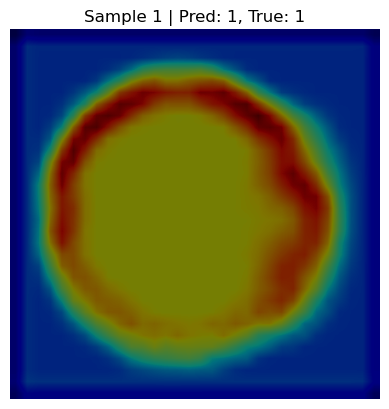


[Sample 2] Pred: 1, True: 1, Max Heatmap: 0.9889


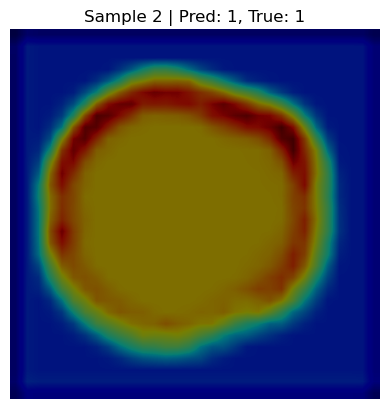


[Sample 3] Pred: 1, True: 0, Max Heatmap: 0.9874


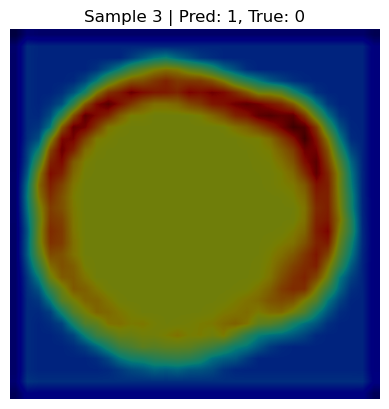


[Sample 4] Pred: 1, True: 0, Max Heatmap: 0.9931


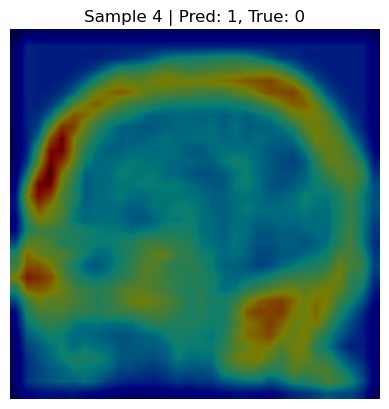


[Sample 5] Pred: 1, True: 0, Max Heatmap: 0.9916


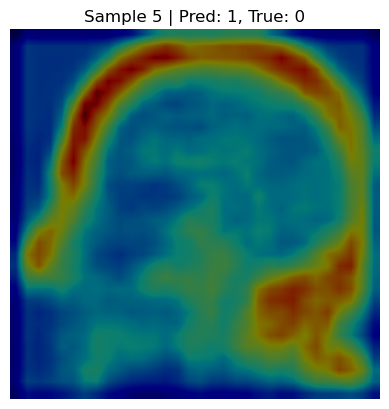

In [44]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Simple3DCNN_GradCam().to(device)
model.load_state_dict(torch.load("simple3dcnn_gradcam.pth"))
gradcam_multiple_samples(model, test_dataset, device, num_samples=5, save=True)

In [46]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob

def load_heatmaps_by_label(folder_path):
    ad_heatmaps, cn_heatmaps = [], []
    for file in glob(os.path.join(folder_path, "heatmap_*.npy")):
        # Get true label from filename
        label = int(file.split("label")[1][0])
        heatmap = np.load(file)
        if label == 1:
            ad_heatmaps.append(heatmap)
        elif label == 0:
            cn_heatmaps.append(heatmap)
    return np.array(ad_heatmaps), np.array(cn_heatmaps)

In [48]:
def plot_mean_difference(ad_heatmaps, cn_heatmaps):
    ad_mean = np.mean(ad_heatmaps, axis=0)
    cn_mean = np.mean(cn_heatmaps, axis=0)
    diff = ad_mean - cn_mean

    # Show middle slice
    mid = diff.shape[2] // 2
    plt.figure(figsize=(6, 5), dpi=120)
    plt.imshow(diff[:, :, mid], cmap='bwr', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
    plt.colorbar(label="AD - CN Heatmap")
    plt.title("Mean ROI Difference (Mid Slice)")
    plt.axis('off')
    plt.show()

In [50]:
from scipy.stats import ttest_ind

def plot_voxelwise_tmap(ad_heatmaps, cn_heatmaps):
    t_vals, p_vals = ttest_ind(ad_heatmaps, cn_heatmaps, axis=0, equal_var=False)
    t_vals[np.isnan(t_vals)] = 0  # clean NaNs

    # Show mid slice of t-map
    mid = t_vals.shape[2] // 2
    plt.figure(figsize=(6, 5), dpi=120)
    plt.imshow(t_vals[:, :, mid], cmap='coolwarm')
    plt.colorbar(label="t-value (AD vs CN)")
    plt.title("Voxel-wise t-map (Mid Slice)")
    plt.axis('off')
    plt.show()

    return t_vals, p_vals

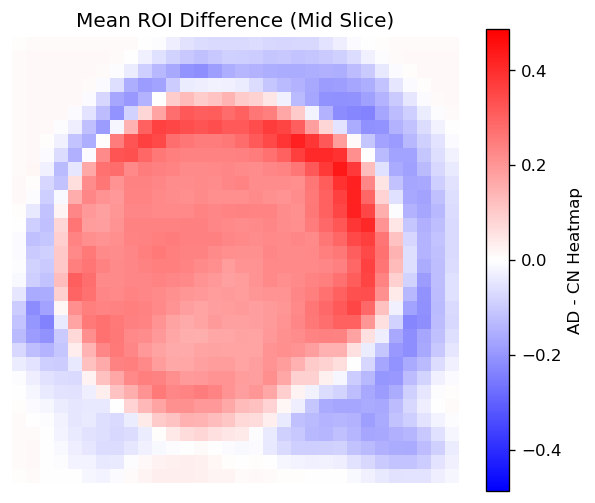

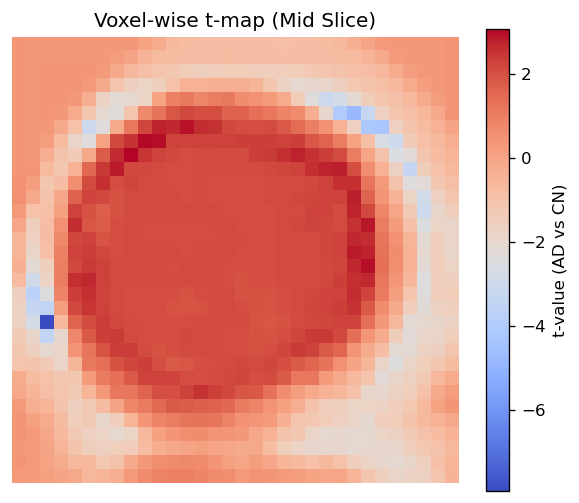

In [52]:
folder = "gradcam_outputs"  # where .npy files are stored

ad_maps, cn_maps = load_heatmaps_by_label(folder)
plot_mean_difference(ad_maps, cn_maps)

# Optional statistical test
t_vals, p_vals = plot_voxelwise_tmap(ad_maps, cn_maps)

Number of clusters found: 25


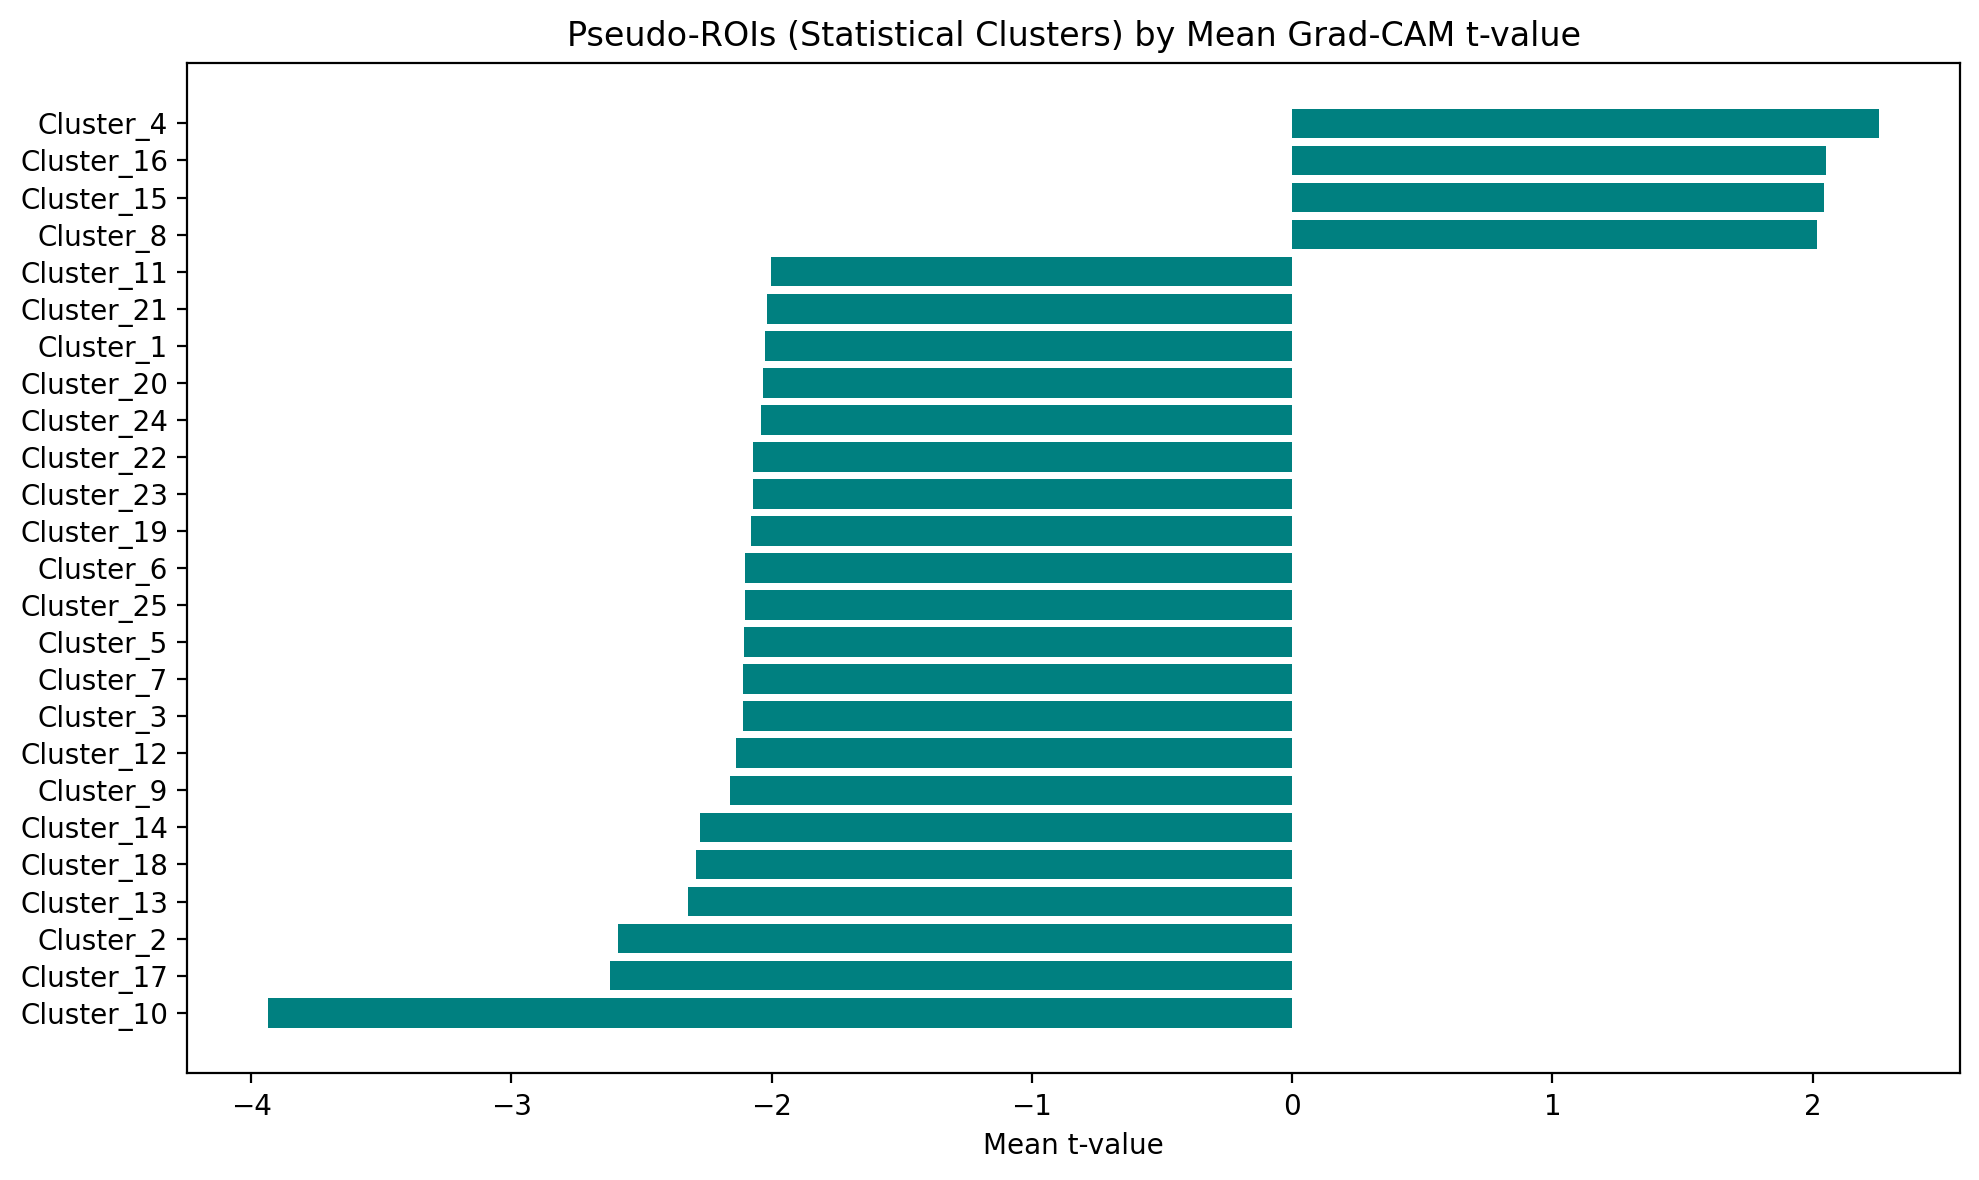

In [54]:
from scipy.ndimage import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Threshold t-map (can be masked or raw)
threshold = 2.0
binary_mask = np.abs(t_vals) > threshold

# Label connected regions (clusters)
labeled_clusters, num_clusters = label(binary_mask)

print(f"Number of clusters found: {num_clusters}")

# Collect mean t-value for each cluster
roi_results = []

for cluster_id in range(1, num_clusters + 1):
    cluster_mask = labeled_clusters == cluster_id
    t_vals_cluster = t_vals[cluster_mask]

    mean_val = np.mean(t_vals_cluster)
    size = np.sum(cluster_mask)

    roi_results.append({
        "Pseudo_ROI": f"Cluster_{cluster_id}",
        "Size": size,
        "Mean_GradCAM_t": mean_val
    })

# Create summary table
roi_df = pd.DataFrame(roi_results).sort_values(by="Mean_GradCAM_t", ascending=False)

# Plot
plt.figure(figsize=(10, 6), dpi=200)
plt.barh(roi_df["Pseudo_ROI"], roi_df["Mean_GradCAM_t"], color="teal")
plt.title("Pseudo-ROIs (Statistical Clusters) by Mean Grad-CAM t-value")
plt.xlabel("Mean t-value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [56]:
from scipy.ndimage import label, center_of_mass
import matplotlib.pyplot as plt
import numpy as np

# Threshold your t-map (already computed)
threshold = 2.0
binary_mask = np.abs(t_vals) > threshold

# Label connected clusters
labeled_clusters, num_clusters = label(binary_mask)
print(f"Found {num_clusters} clusters.")

Found 25 clusters.


In [58]:
# Choose mid-slice
mid_slice = t_vals.shape[2] // 2
base_slice = np.abs(t_vals[:, :, mid_slice])  # or use actual structural if available

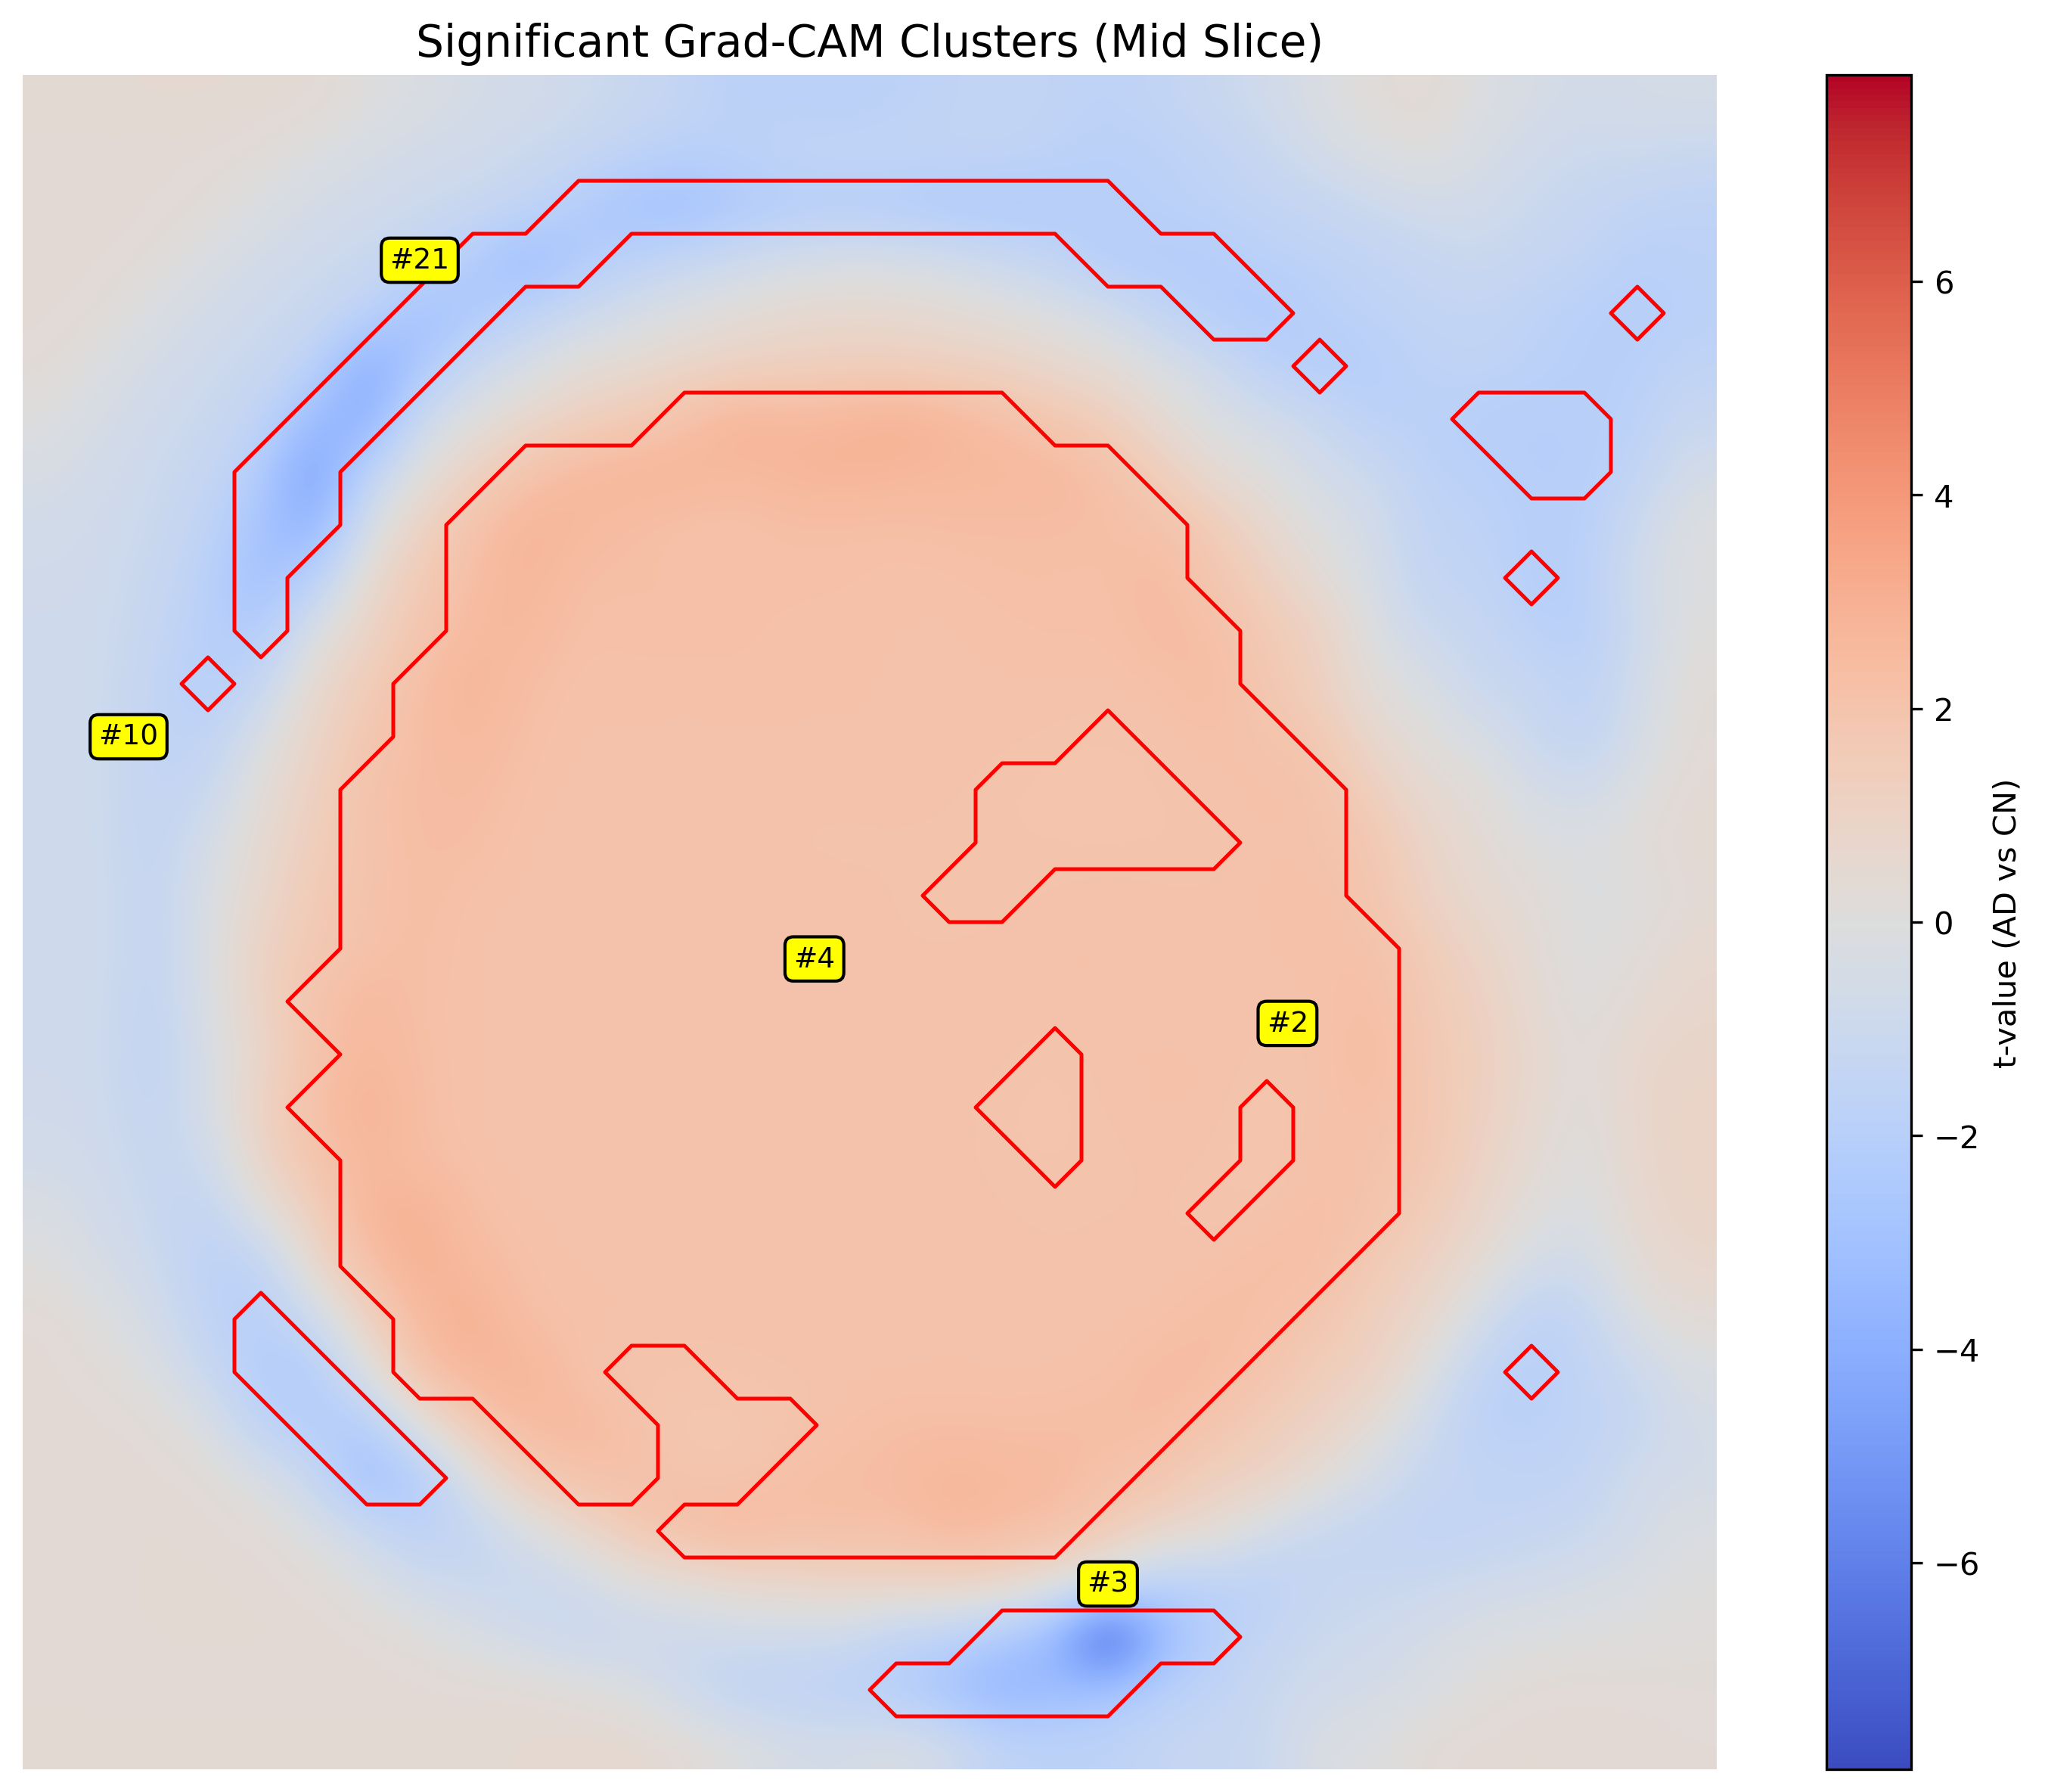

In [60]:
from scipy.ndimage import label, center_of_mass
import matplotlib.pyplot as plt
import numpy as np

# Thresholding
threshold = 2.0
binary_mask = np.abs(t_vals) > threshold

# Label connected voxel clusters
labeled_clusters, num_clusters = label(binary_mask)

# Choose the mid slice
mid_z = t_vals.shape[2] // 2
t_slice = t_vals[:, :, mid_z]
cluster_slice = labeled_clusters[:, :, mid_z]

plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(t_slice.T, cmap='coolwarm', origin='lower',
           interpolation='bicubic',
           vmin=-np.max(np.abs(t_slice)), vmax=np.max(np.abs(t_slice)))

plt.title("Significant Grad-CAM Clusters (Mid Slice)", fontsize=14)
plt.colorbar(label="t-value (AD vs CN)")
plt.axis("off")

# Overlay cluster contours and labels
for i in range(1, num_clusters + 1):
    mask = (cluster_slice == i)
    if np.sum(mask) == 0:
        continue
    y, x = center_of_mass(mask)
    plt.contour(mask.T, colors='red', linewidths=1.2)
    plt.text(x, y, f"#{i}", color='black', fontsize=9, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1))

plt.tight_layout()
plt.savefig("gradcam_clusters_mid_slice.png", dpi=300)
plt.show()

In [62]:
cluster_info = []

for i in range(1, num_clusters + 1):
    mask = (labeled_clusters == i)
    if np.sum(mask) == 0:
        continue
    z, y, x = center_of_mass(mask)  # Note: z first in 3D
    cluster_info.append({
        "Cluster": f"# {i}",
        "Center_x": round(x, 1),
        "Center_y": round(y, 1),
        "Center_z": round(z, 1),
        "Size": int(np.sum(mask)),
        "Mean_t": round(np.mean(t_vals[mask]), 2)
    })

import pandas as pd
cluster_df = pd.DataFrame(cluster_info)
cluster_df = cluster_df.sort_values(by="Mean_t", ascending=False)
cluster_df

,Cluster,Center_x,Center_y,Center_z,Size,Mean_t
3,# 4,16.1,14.3,14.7,3038,2.26
15,# 16,23.0,16.0,22.0,1,2.05
14,# 15,23.0,12.3,20.3,3,2.04
7,# 8,21.0,7.0,13.0,1,2.02
10,# 11,7.0,6.0,16.0,1,-2.00
0,# 1,14.0,14.0,2.0,1,-2.02
20,# 21,16.0,7.0,28.0,1,-2.02
19,# 20,19.0,6.0,27.0,1,-2.03
23,# 24,17.0,21.0,29.0,1,-2.04
22,# 23,22.7,22.8,29.1,18,-2.07


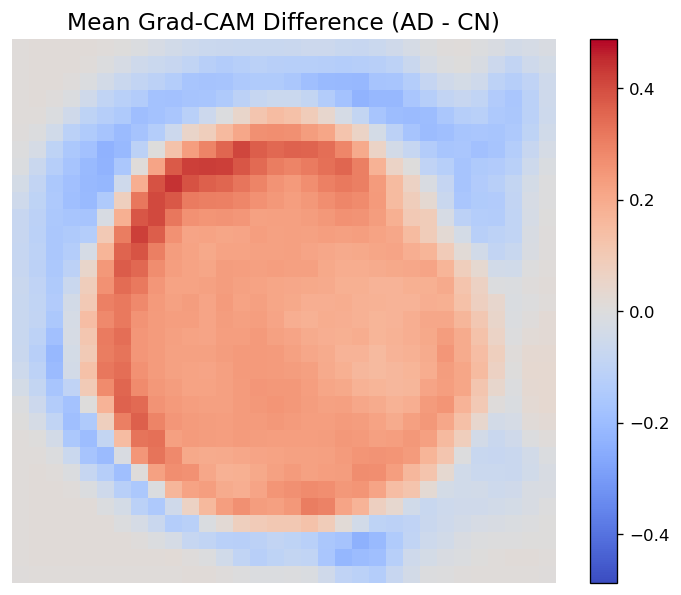

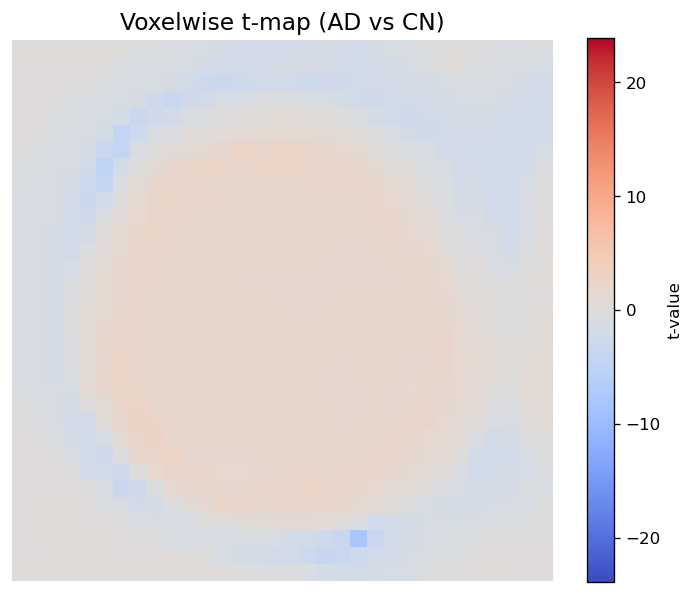

Number of clusters found: 25


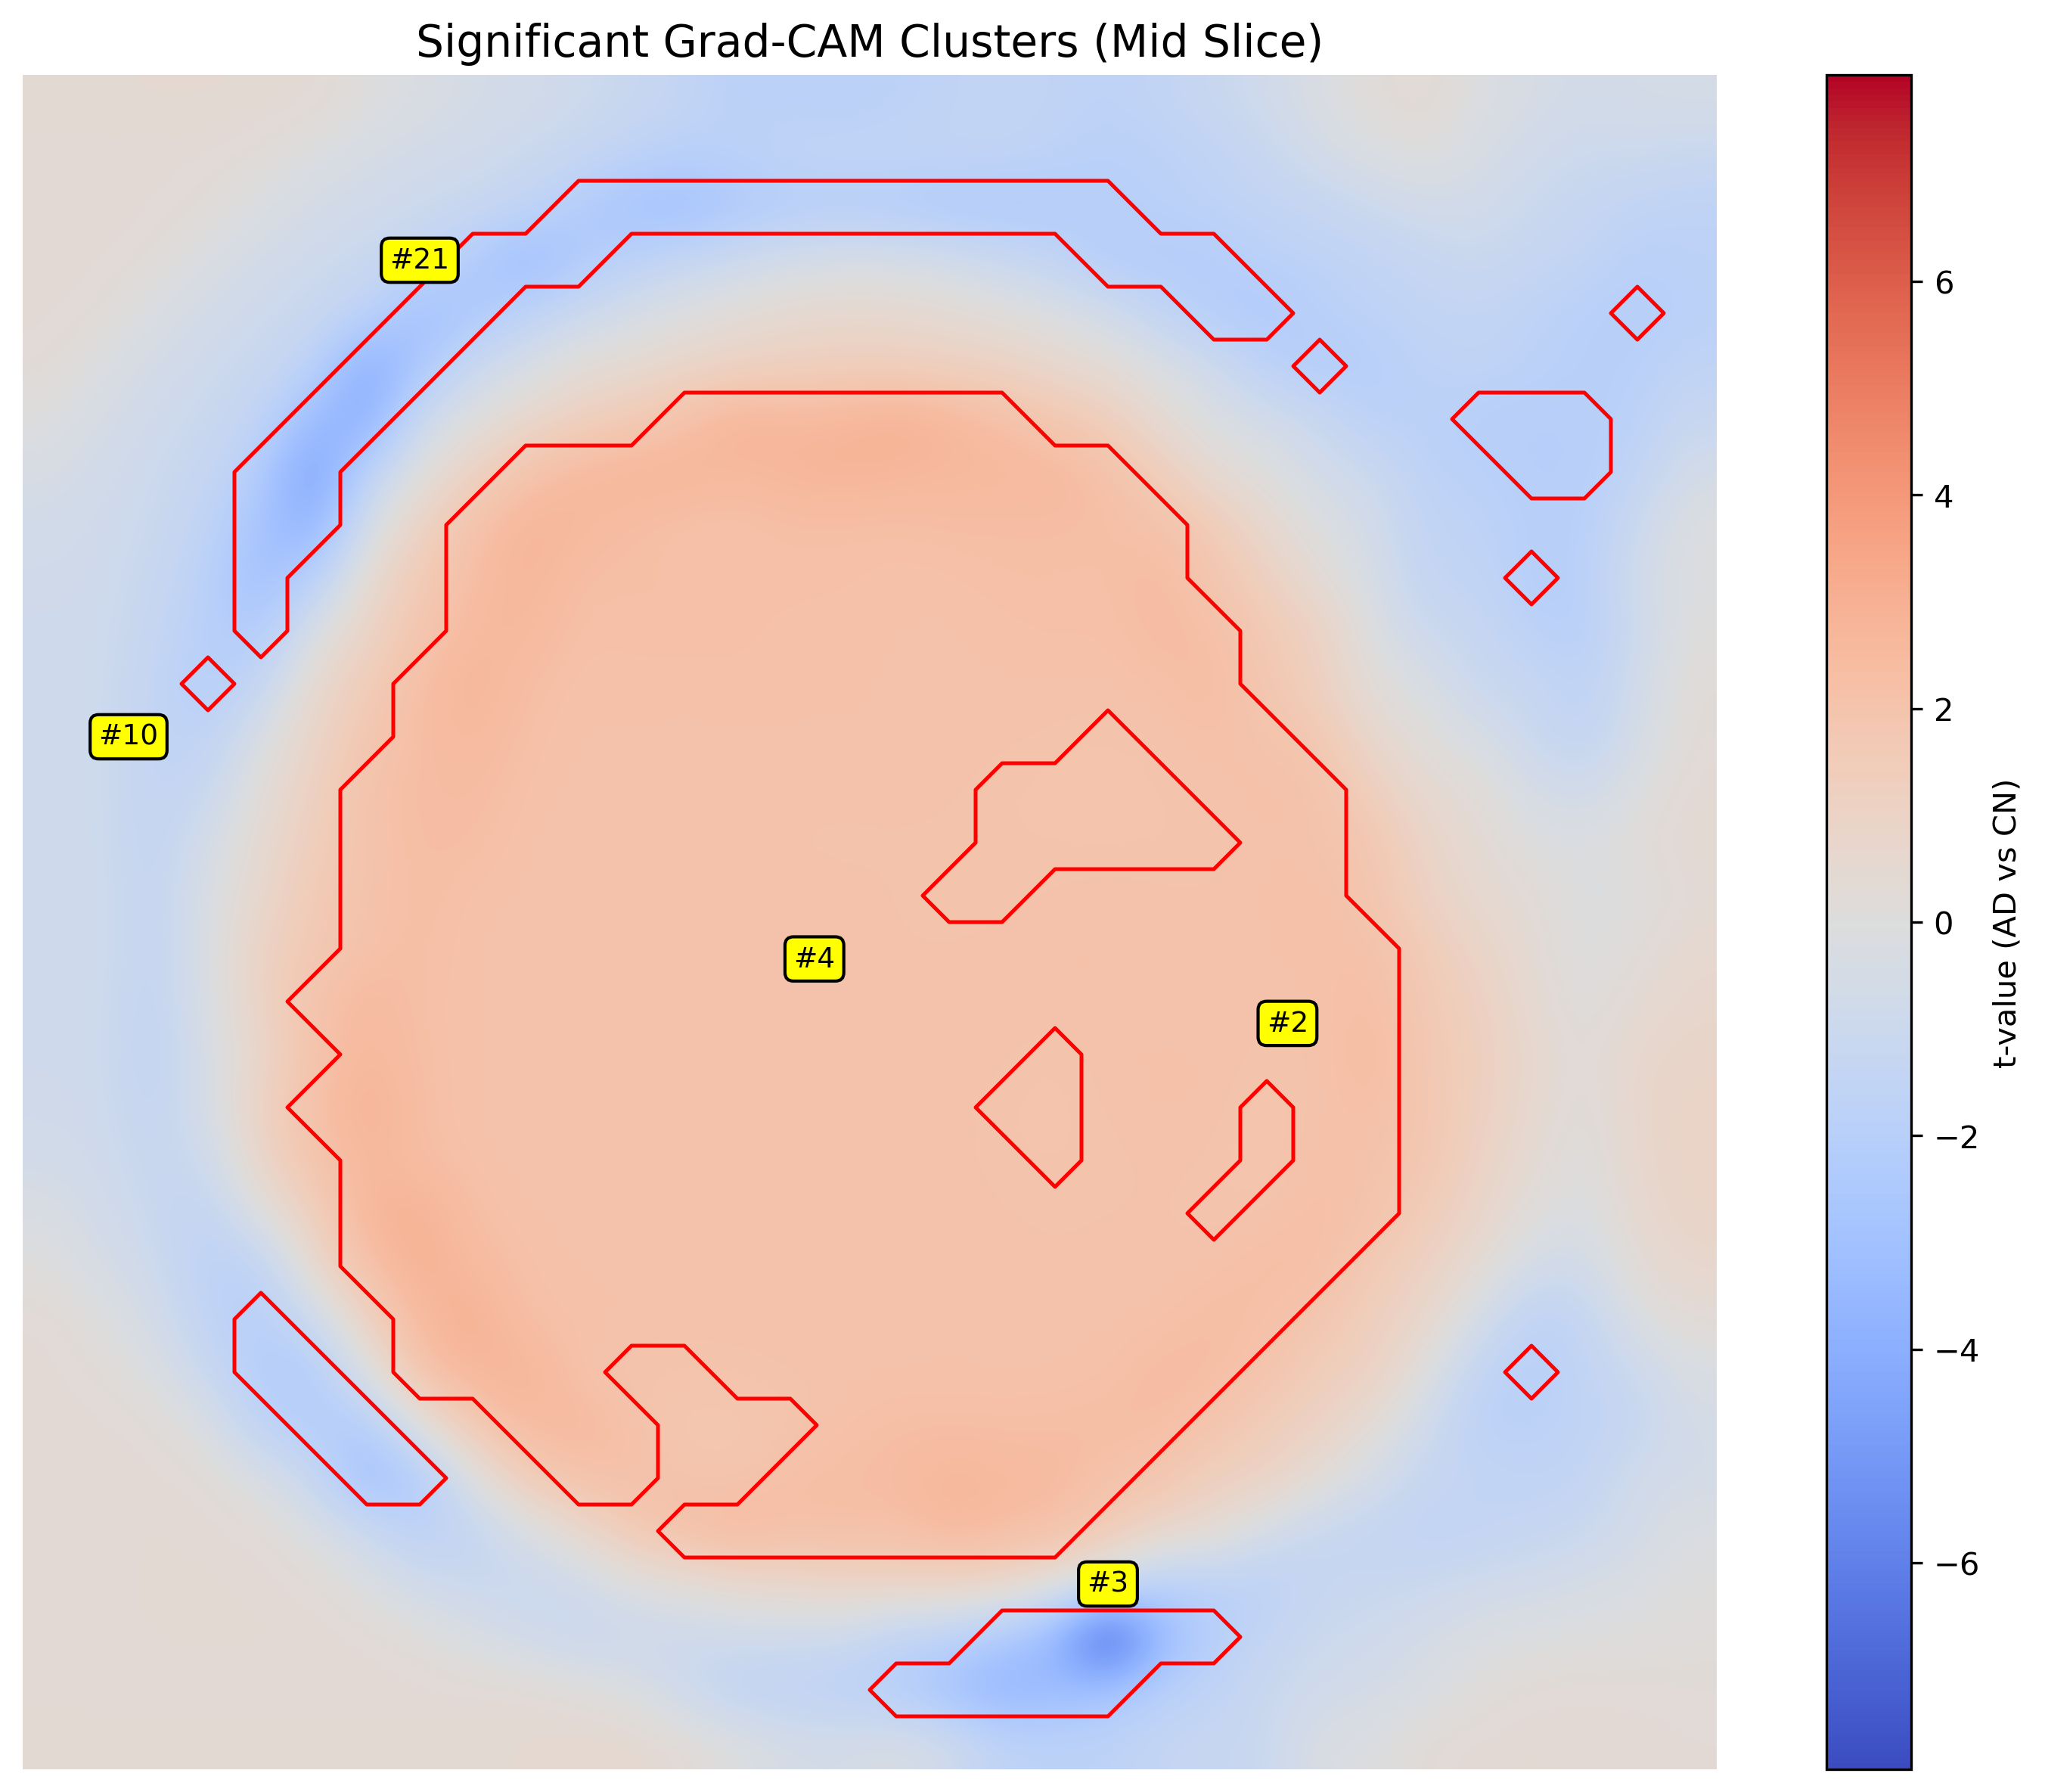

[get_dataset_dir] Dataset found in /Users/sangeun/nilearn_data/fsl


Cluster → Anatomical Overlap:
Cluster 1 → No overlap found
Cluster 2 → Insular Cortex
Cluster 4 → No overlap found
Cluster 10 → No overlap found
Cluster 18 → No overlap found
Cluster 19 → No overlap found
Cluster 23 → No overlap found


/var/folders/_8/75kfzcss4jj8rss0_gkvrd2w0000gn/T/ipykernel_1304/531077815.py:124: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  cluster_img_resampled = image.resample_img(
/var/folders/_8/75kfzcss4jj8rss0_gkvrd2w0000gn/T/ipykernel_1304/531077815.py:124: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  cluster_img_resampled = image.resample_img(


In [70]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import label, center_of_mass
from scipy.stats import ttest_ind
from nilearn import datasets, image

# ====================================
# Step 1: Load Grad-CAM Heatmaps
# ====================================

import os
from glob import glob

def load_heatmaps_by_label(folder_path):
    ad_heatmaps, cn_heatmaps = [], []
    for file in glob(os.path.join(folder_path, "heatmap_*.npy")):
        label_value = int(file.split("label")[1][0])
        heatmap = np.load(file)
        if label_value == 1:
            ad_heatmaps.append(heatmap)
        elif label_value == 0:
            cn_heatmaps.append(heatmap)
    return np.array(ad_heatmaps), np.array(cn_heatmaps)

folder = "gradcam_outputs"
ad_maps, cn_maps = load_heatmaps_by_label(folder)

# ====================================
# Step 2: Plot Mean Difference
# ====================================

def plot_mean_difference(ad_maps, cn_maps):
    ad_mean = np.mean(ad_maps, axis=0)
    cn_mean = np.mean(cn_maps, axis=0)
    diff = ad_mean - cn_mean

    mid = diff.shape[2] // 2
    plt.figure(figsize=(6, 5), dpi=120)
    plt.imshow(diff[:, :, mid].T, cmap="coolwarm", origin="lower",
               vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
    plt.title("Mean Grad-CAM Difference (AD - CN)", fontsize=14)
    plt.colorbar()
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_mean_difference(ad_maps, cn_maps)

# ====================================
# Step 3: Voxelwise t-Test
# ====================================

def plot_voxelwise_tmap(ad_maps, cn_maps):
    t_vals, p_vals = ttest_ind(ad_maps, cn_maps, axis=0, equal_var=False)
    
    mid = t_vals.shape[2] // 2
    plt.figure(figsize=(6, 5), dpi=120)
    plt.imshow(t_vals[:, :, mid].T, cmap="coolwarm", origin="lower",
               vmin=-np.max(np.abs(t_vals)), vmax=np.max(np.abs(t_vals)))
    plt.title("Voxelwise t-map (AD vs CN)", fontsize=14)
    plt.colorbar(label="t-value")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
    return t_vals, p_vals

t_vals, p_vals = plot_voxelwise_tmap(ad_maps, cn_maps)

# ====================================
# Step 4: Threshold and Cluster
# ====================================

threshold = 2.0
binary_mask = np.abs(t_vals) > threshold

labeled_clusters, num_clusters = label(binary_mask)
print(f"Number of clusters found: {num_clusters}")

# ====================================
# Step 5: Visualize Mid Slice with Clusters
# ====================================

mid_z = t_vals.shape[2] // 2
t_slice = t_vals[:, :, mid_z]
cluster_slice = labeled_clusters[:, :, mid_z]

plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(t_slice.T, cmap='coolwarm', origin='lower',
           interpolation='bicubic',
           vmin=-np.max(np.abs(t_slice)), vmax=np.max(np.abs(t_slice)))
plt.title("Significant Grad-CAM Clusters (Mid Slice)", fontsize=14)
plt.colorbar(label="t-value (AD vs CN)")
plt.axis("off")

for i in range(1, num_clusters + 1):
    mask = (cluster_slice == i)
    if np.sum(mask) == 0:
        continue
    y, x = center_of_mass(mask)
    plt.contour(mask.T, colors='red', linewidths=1.2)
    plt.text(x, y, f"#{i}", color='black', fontsize=9, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1))

plt.tight_layout()
plt.savefig("gradcam_clusters_mid_slice.png", dpi=300)
plt.show()

# ====================================
# Step 6: In-Memory Mapping to Brain Atlas
# ====================================

# Create a pseudo-ROI image in memory
affine = np.eye(4)  # If you have a real affine, use it here
cluster_img = nib.Nifti1Image(labeled_clusters.astype(np.int16), affine)

# Load Atlas properly
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_img = image.load_img(atlas['maps'])  # <---- FIXED HERE
atlas_labels = atlas['labels']

# Resample pseudo-ROIs to match atlas space
cluster_img_resampled = image.resample_img(
    cluster_img,
    target_affine=atlas_img.affine,
    target_shape=atlas_img.shape,
    interpolation='nearest'
)

# Extract arrays
cluster_data = cluster_img_resampled.get_fdata()
atlas_data = atlas_img.get_fdata()

# Extract arrays
cluster_data = cluster_img_resampled.get_fdata()
atlas_data = atlas_img.get_fdata()

# Find overlaps
unique_clusters = np.unique(cluster_data)
unique_clusters = unique_clusters[unique_clusters != 0]  # Ignore background

print("\nCluster → Anatomical Overlap:")
for cluster_id in unique_clusters:
    mask = (cluster_data == cluster_id)
    overlapping_regions = atlas_data[mask]
    unique, counts = np.unique(overlapping_regions, return_counts=True)
    
    region_counts = dict(zip(unique, counts))
    region_counts = {int(k): v for k, v in region_counts.items() if k != 0}

    if region_counts:
        most_common_region = max(region_counts, key=region_counts.get)
        region_name = atlas_labels[most_common_region]
        print(f"Cluster {int(cluster_id)} → {region_name}")
    else:
        print(f"Cluster {int(cluster_id)} → No overlap found")

In [72]:
import pandas as pd

file_path = "/Users/sangeun/Documents/UPENNBIOMK_ROCHE_ELECSYS_11Feb2025.csv"
general_biomarker = pd.read_csv(file_path)
general_biomarker.head()

,PHASE,PTID,RID,VISCODE2,EXAMDATE,BATCH,RUNDATE,ABETA40,ABETA42,TAU,PTAU,COMMENT,update_stamp
0,ADNI1,011_S_0003,3,bl,2005-09-12,UPENNBIOMK9,2016-12-14,NaN,741.5,239.7,22.83,NaN,2024-01-12 11:11:42.0
1,ADNI1,011_S_0003,3,m12,2006-09-13,UPENNBIOMK9,2016-12-14,NaN,601.4,251.7,24.18,NaN,2024-01-12 11:11:42.0
2,ADNI1,022_S_0004,4,bl,2005-11-22,UPENNBIOMK9,2017-01-09,NaN,1501.0,153.1,13.29,NaN,2024-01-12 11:11:42.0
3,ADNI1,022_S_0004,4,m12,2006-11-28,UPENNBIOMK9,2017-01-09,NaN,1176.0,159.7,13.30,NaN,2024-01-12 11:11:42.0
4,ADNI1,011_S_0005,5,bl,2005-09-07,UPENNBIOMK9,2016-11-22,NaN,547.3,337.0,33.43,NaN,2024-01-12 11:11:42.0


In [74]:
CSF_biomarker = general_biomarker[["PTID", "RID", "EXAMDATE", "ABETA42", "TAU", "PTAU"]]
CSF_biomarker

,PTID,RID,EXAMDATE,ABETA42,TAU,PTAU
0,011_S_0003,3,2005-09-12,741.5,239.70,22.83
1,011_S_0003,3,2006-09-13,601.4,251.70,24.18
2,022_S_0004,4,2005-11-22,1501.0,153.10,13.29
3,022_S_0004,4,2006-11-28,1176.0,159.70,13.30
4,011_S_0005,5,2005-09-07,547.3,337.00,33.43
...,...,...,...,...,...,...
3169,131_S_7032,7032,2022-06-09,887.0,502.90,49.46
3170,941_S_7041,7041,2022-03-01,1471.0,193.80,14.78
3171,129_S_7042,7042,2022-03-15,820.7,95.04,NaN
3172,033_S_7066,7066,2022-05-11,700.6,184.90,14.30


In [76]:
import pandas as pd

csf_df = pd.read_csv("/Users/sangeun/Documents/UPENNBIOMK_ROCHE_ELECSYS_11Feb2025.csv")       
diag_df = pd.read_csv("/Users/sangeun/Documents/DXSUM_22Feb2025.csv")   

# Merge CSF data with diagnosis info
merged_df = pd.merge(csf_df, diag_df[['PTID', 'DIAGNOSIS']], on='PTID', how='left')

# Map DIAGNOSIS codes: AD (3) → 1, CN (1) → 0
merged_df['Diagnosis_Label'] = merged_df['DIAGNOSIS'].map({3: 1, 1: 0})

# Drop rows with missing diagnosis labels
merged_df = merged_df.dropna(subset=['Diagnosis_Label'])

# Convert to integer
merged_df['Diagnosis_Label'] = merged_df['Diagnosis_Label'].astype(int)

merged_df.to_csv("merged_csf_with_labels.csv", index=False)
merged_df.head()

,PHASE,PTID,RID,VISCODE2,EXAMDATE,BATCH,RUNDATE,ABETA40,ABETA42,TAU,PTAU,COMMENT,update_stamp,DIAGNOSIS,Diagnosis_Label
0,ADNI1,011_S_0003,3,bl,2005-09-12,UPENNBIOMK9,2016-12-14,NaN,741.5,239.7,22.83,NaN,2024-01-12 11:11:42.0,3.0,1
1,ADNI1,011_S_0003,3,bl,2005-09-12,UPENNBIOMK9,2016-12-14,NaN,741.5,239.7,22.83,NaN,2024-01-12 11:11:42.0,3.0,1
2,ADNI1,011_S_0003,3,bl,2005-09-12,UPENNBIOMK9,2016-12-14,NaN,741.5,239.7,22.83,NaN,2024-01-12 11:11:42.0,3.0,1
3,ADNI1,011_S_0003,3,bl,2005-09-12,UPENNBIOMK9,2016-12-14,NaN,741.5,239.7,22.83,NaN,2024-01-12 11:11:42.0,3.0,1
4,ADNI1,011_S_0003,3,m12,2006-09-13,UPENNBIOMK9,2016-12-14,NaN,601.4,251.7,24.18,NaN,2024-01-12 11:11:42.0,3.0,1


In [78]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn

# -----------------------------
# 1. Preprocessing the Data
# -----------------------------
df = merged_df.copy()

# Convert EXAMDATE to datetime
df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'])

# Sort by subject and date, calculate months since baseline
df = df.sort_values(['PTID', 'EXAMDATE'])
df['Months'] = df.groupby('PTID')['EXAMDATE'].transform(lambda x: (x - x.min()) / pd.Timedelta(days=30))
df['Months'] = df['Months'].round()

# Drop rows with missing values
df = df.dropna(subset=['TAU', 'PTAU', 'ABETA42', 'Diagnosis_Label'])

# Normalize and clip features
for col in ['TAU', 'PTAU', 'ABETA42', 'Months']:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    df[col] = df[col].clip(-3, 3)

df['Diagnosis_Label'] = df['Diagnosis_Label'].astype(int)

In [80]:
# -----------------------------
# 2. Dataset & DataLoader
# -----------------------------
class CSFDataset(Dataset):
    def __init__(self, df):
        self.sequences = []
        self.labels = []

        for ptid, group in df.groupby('PTID'):
            group = group.sort_values('Months')
            sequence = torch.tensor(group[['TAU', 'PTAU', 'ABETA42', 'Months']].values, dtype=torch.float32)
            label = int(group['Diagnosis_Label'].iloc[0])
            self.sequences.append(sequence)
            self.labels.append(torch.tensor(label, dtype=torch.long))

        self.padded_sequences = pad_sequence(self.sequences, batch_first=True)
        self.masks = torch.tensor([[1]*len(seq) + [0]*(self.padded_sequences.size(1) - len(seq))
                                   for seq in self.sequences])

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.padded_sequences[idx], self.masks[idx], self.labels[idx]

dataset = CSFDataset(df)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

In [82]:
# -----------------------------
# 3. LSTM Model Definition
# -----------------------------
class CSFLSTMClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, num_classes=2):
        super(CSFLSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, mask):
        lengths = mask.sum(dim=1).cpu()
        packed = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        packed_output, (hn, _) = self.lstm(packed)
        out = self.fc(hn[-1])  # Use last hidden state
        return out

In [84]:
# -----------------------------
# 4. Model Training Loop
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CSFLSTMClassifier(input_dim=4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)  # Lowered LR

for epoch in range(10):
    model.train()
    correct, total = 0, 0
    running_loss = 0.0

    for x, mask, labels in train_loader:
        x, mask, labels = x.to(device), mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(x, mask)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # 🔒 Gradient clipping
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()

    acc = correct / total * 100
    print(f"Epoch {epoch+1}: Loss = {running_loss:.4f}, Accuracy = {acc:.2f}%")
    
# -----------------------------
# 5. Save the Trained Model
# -----------------------------
torch.save(model.state_dict(), "csf_lstm_model.pth")
print("Model saved as csf_lstm_model.pth")

Epoch 1: Loss = 100.0485, Accuracy = 73.85%
Epoch 2: Loss = 84.9021, Accuracy = 79.18%
Epoch 3: Loss = 74.2604, Accuracy = 80.15%
Epoch 4: Loss = 72.2328, Accuracy = 81.19%
Epoch 5: Loss = 71.1825, Accuracy = 81.68%
Epoch 6: Loss = 70.1212, Accuracy = 81.44%
Epoch 7: Loss = 69.2738, Accuracy = 81.92%
Epoch 8: Loss = 68.3436, Accuracy = 82.16%
Epoch 9: Loss = 67.5969, Accuracy = 81.76%
Epoch 10: Loss = 66.9940, Accuracy = 81.92%
Model saved as csf_lstm_model.pth


In [86]:
import torch.nn.functional as F

# ----- LSTM -----
class CSFLSTMClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, num_classes=2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, mask):
        lengths = mask.sum(dim=1).cpu()
        packed = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, _) = self.lstm(packed)
        out = self.fc(hn[-1])
        return out

# ----- GRU -----
class CSFGRUClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, num_classes=2):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, mask):
        lengths = mask.sum(dim=1).cpu()
        packed = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        _, hn = self.gru(packed)
        out = self.fc(hn[-1])
        return out

# ----- TCN -----
from torch.nn.utils import weight_norm

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super().__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size]

class TemporalBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, dilation, padding):
        super().__init__()
        self.conv1 = weight_norm(nn.Conv1d(in_channels, out_channels, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu = nn.ReLU()
        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu)
        self.downsample = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else None

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return F.relu(out + res)

class CSFTCNClassifier(nn.Module):
    def __init__(self, input_dim=4, num_channels=[32, 64], kernel_size=2, num_classes=2):
        super().__init__()
        layers = []
        for i in range(len(num_channels)):
            dilation_size = 2 ** i
            in_channels = input_dim if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1,
                                     dilation=dilation_size, padding=(kernel_size-1)*dilation_size)]
        self.network = nn.Sequential(*layers)
        self.fc = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x, mask):
        x = x.permute(0, 2, 1)  # (B, F, T) → TCN expects this
        x = self.network(x)
        x = x.mean(dim=2)  # global average pooling over time
        return self.fc(x)

# ----- Transformer -----
class CSFTransformerClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, num_classes=2, num_heads=2, num_layers=2):
        super().__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, mask):
        x = self.embedding(x)
        key_padding_mask = ~mask.bool()
        x = self.transformer(x, src_key_padding_mask=key_padding_mask)
        return self.fc(x[:, 0])  # or use mean pooling

# ----- MLP -----
class CSFMLPClassifier(nn.Module):
    def __init__(self, input_dim=4, hidden_dim=64, num_classes=2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim * 3, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, mask):
        valid = mask.unsqueeze(-1)
        mean = (x * valid).sum(dim=1) / valid.sum(dim=1)
        std = ((x - mean.unsqueeze(1))**2 * valid).sum(dim=1) / valid.sum(dim=1)
        feat = torch.cat([mean, std.sqrt(), mean / (std.sqrt() + 1e-6)], dim=1)
        return self.fc2(self.relu(self.fc1(feat)))

In [88]:
# -----------------------------
# 2. Training & Evaluation Loop
# -----------------------------
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for x, mask, y in train_loader:
            x, mask, y = x.to(device), mask.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x, mask)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * x.size(0)
        train_loss /= len(train_loader.dataset)

        val_acc, val_auc, val_f1 = evaluate_model(model, val_loader)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f} | AUC: {val_auc:.4f} | F1: {val_f1:.4f}")
    
    return model


def evaluate_model(model, loader):
    model.eval()
    all_preds, all_probs, all_labels = [], [], []

    with torch.no_grad():
        for x, mask, y in loader:
            x, mask = x.to(device), mask.to(device)
            output = model(x, mask)
            probs = torch.softmax(output, dim=1)[:, 1].cpu()
            preds = torch.argmax(output, dim=1).cpu()
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(y)

    acc = accuracy_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_probs)
    f1 = f1_score(all_labels, all_preds)
    return acc, auc, f1

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
import random
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from collections import defaultdict

# Set seed
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cpu


In [92]:
class CSFDataset(Dataset):
    def __init__(self, df):
        self.ptid_sequences = []
        self.labels = []

        for ptid, group in df.groupby('PTID'):
            x = torch.tensor(group[['TAU', 'PTAU', 'ABETA42', 'Months']].values, dtype=torch.float32)
            y = int(group['Diagnosis_Label'].iloc[0])
            self.ptid_sequences.append(x)
            self.labels.append(y)

    def __len__(self):
        return len(self.ptid_sequences)

    def __getitem__(self, idx):
        return self.ptid_sequences[idx], self.labels[idx]

def collate_fn(batch):
    sequences, labels = zip(*batch)
    sequences_padded = pad_sequence(sequences, batch_first=True)
    lengths = torch.tensor([len(seq) for seq in sequences])
    mask = torch.arange(sequences_padded.size(1))[None, :] < lengths[:, None]
    return sequences_padded, mask, torch.tensor(labels)

In [94]:
def train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for x, mask, y in train_loader:
            x, mask, y = x.to(device), mask.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x, mask)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * x.size(0)
        train_loss /= len(train_loader.dataset)

        val_acc, val_auc, val_f1 = evaluate_model(model, val_loader)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f} | AUC: {val_auc:.4f} | F1: {val_f1:.4f}")
    
    return model

def evaluate_model(model, loader):
    model.eval()
    all_preds, all_probs, all_labels = [], [], []

    with torch.no_grad():
        for x, mask, y in loader:
            x, mask = x.to(device), mask.to(device)
            output = model(x, mask)
            probs = torch.softmax(output, dim=1)[:, 1].cpu()
            preds = torch.argmax(output, dim=1).cpu()
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(y)

    acc = accuracy_score(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_probs)
    f1 = f1_score(all_labels, all_preds)
    return acc, auc, f1

In [96]:
full_dataset = CSFDataset(df)
train_len = int(0.7 * len(full_dataset))
val_len = int(0.15 * len(full_dataset))
test_len = len(full_dataset) - train_len - val_len

train_set, val_set, test_set = random_split(full_dataset, [train_len, val_len, test_len])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, collate_fn=collate_fn)

In [98]:
results = defaultdict(list)
models = {
    "LSTM": CSFLSTMClassifier,
    "GRU": CSFGRUClassifier,
    "TCN": CSFTCNClassifier,
    "Transformer": CSFTransformerClassifier,
    "MLP": CSFMLPClassifier
}

for name, ModelClass in models.items():
    print(f"\n========================")
    print(f" Training: {name} Model")
    print(f"========================")

    model = ModelClass()
    trained_model = train_model(model, train_loader, val_loader, num_epochs=10, lr=1e-3)
    
    acc, auc, f1 = evaluate_model(trained_model, test_loader)
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["ROC-AUC"].append(auc)
    results["F1 Score"].append(f1)


 Training: LSTM Model
Epoch 1/10 - Loss: 0.6064 | Val Acc: 0.7405 | AUC: 0.8598 | F1: 0.6883
Epoch 2/10 - Loss: 0.4736 | Val Acc: 0.8270 | AUC: 0.8618 | F1: 0.8182
Epoch 3/10 - Loss: 0.4373 | Val Acc: 0.8270 | AUC: 0.8756 | F1: 0.8202
Epoch 4/10 - Loss: 0.4273 | Val Acc: 0.8108 | AUC: 0.8739 | F1: 0.8087
Epoch 5/10 - Loss: 0.4224 | Val Acc: 0.8108 | AUC: 0.8755 | F1: 0.8000
Epoch 6/10 - Loss: 0.4213 | Val Acc: 0.8108 | AUC: 0.8795 | F1: 0.8000
Epoch 7/10 - Loss: 0.4111 | Val Acc: 0.8054 | AUC: 0.8803 | F1: 0.7931
Epoch 8/10 - Loss: 0.4099 | Val Acc: 0.8324 | AUC: 0.8812 | F1: 0.8268
Epoch 9/10 - Loss: 0.4048 | Val Acc: 0.8270 | AUC: 0.8790 | F1: 0.8242
Epoch 10/10 - Loss: 0.4005 | Val Acc: 0.8162 | AUC: 0.8812 | F1: 0.8090

 Training: GRU Model
Epoch 1/10 - Loss: 0.6261 | Val Acc: 0.7459 | AUC: 0.8616 | F1: 0.7006
Epoch 2/10 - Loss: 0.4740 | Val Acc: 0.8162 | AUC: 0.8628 | F1: 0.8090
Epoch 3/10 - Loss: 0.4369 | Val Acc: 0.8216 | AUC: 0.8773 | F1: 0.8156
Epoch 4/10 - Loss: 0.4236 | Val

/opt/anaconda3/lib/python3.12/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Epoch 1/10 - Loss: 0.6795 | Val Acc: 0.5405 | AUC: 0.8491 | F1: 0.1414
Epoch 2/10 - Loss: 0.6149 | Val Acc: 0.7946 | AUC: 0.8553 | F1: 0.7841
Epoch 3/10 - Loss: 0.5602 | Val Acc: 0.8054 | AUC: 0.8721 | F1: 0.7907
Epoch 4/10 - Loss: 0.5265 | Val Acc: 0.8162 | AUC: 0.8765 | F1: 0.8265
Epoch 5/10 - Loss: 0.5055 | Val Acc: 0.8162 | AUC: 0.8785 | F1: 0.8090
Epoch 6/10 - Loss: 0.5055 | Val Acc: 0.8162 | AUC: 0.8803 | F1: 0.8111
Epoch 7/10 - Loss: 0.4945 | Val Acc: 0.8270 | AUC: 0.8824 | F1: 0.8242
Epoch 8/10 - Loss: 0.4900 | Val Acc: 0.8216 | AUC: 0.8894 | F1: 0.8197
Epoch 9/10 - Loss: 0.4817 | Val Acc: 0.8216 | AUC: 0.8896 | F1: 0.8272
Epoch 10/10 - Loss: 0.4485 | Val Acc: 0.8216 | AUC: 0.8948 | F1: 0.8177

 Training: Transformer Model


/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/transformer.py:508: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/NestedTensorImpl.cpp:182.)
  output = torch._nested_tensor_from_mask(


Epoch 1/10 - Loss: 0.5284 | Val Acc: 0.8162 | AUC: 0.8910 | F1: 0.8111
Epoch 2/10 - Loss: 0.4386 | Val Acc: 0.8324 | AUC: 0.8853 | F1: 0.8268
Epoch 3/10 - Loss: 0.4207 | Val Acc: 0.8162 | AUC: 0.8866 | F1: 0.7927
Epoch 4/10 - Loss: 0.4250 | Val Acc: 0.8108 | AUC: 0.8998 | F1: 0.7929
Epoch 5/10 - Loss: 0.4472 | Val Acc: 0.8216 | AUC: 0.8934 | F1: 0.8092
Epoch 6/10 - Loss: 0.4284 | Val Acc: 0.8216 | AUC: 0.9009 | F1: 0.8216
Epoch 7/10 - Loss: 0.4161 | Val Acc: 0.8324 | AUC: 0.9018 | F1: 0.8268
Epoch 8/10 - Loss: 0.4162 | Val Acc: 0.8378 | AUC: 0.9018 | F1: 0.8295
Epoch 9/10 - Loss: 0.4195 | Val Acc: 0.8270 | AUC: 0.9032 | F1: 0.7975
Epoch 10/10 - Loss: 0.4190 | Val Acc: 0.8162 | AUC: 0.8992 | F1: 0.8152

 Training: MLP Model
Epoch 1/10 - Loss: 3848.5674 | Val Acc: 0.7405 | AUC: 0.7899 | F1: 0.7391
Epoch 2/10 - Loss: 2085.7110 | Val Acc: 0.7459 | AUC: 0.7737 | F1: 0.7565
Epoch 3/10 - Loss: 1488.3972 | Val Acc: 0.7622 | AUC: 0.8006 | F1: 0.7609
Epoch 4/10 - Loss: 1018.1332 | Val Acc: 0.632

In [100]:
results_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
display(results_df)

,Model,Accuracy,ROC-AUC,F1 Score
2,TCN,0.802139,0.871203,0.764331
1,GRU,0.786096,0.868572,0.736842
0,LSTM,0.770053,0.868453,0.726115
3,Transformer,0.737968,0.850395,0.703030
4,MLP,0.711230,0.756637,0.682353


/var/folders/_8/75kfzcss4jj8rss0_gkvrd2w0000gn/T/ipykernel_1304/4261539406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
/var/folders/_8/75kfzcss4jj8rss0_gkvrd2w0000gn/T/ipykernel_1304/4261539406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
/var/folders/_8/75kfzcss4jj8rss0_gkvrd2w0000gn/T/ipykernel_1304/4261539406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="vi

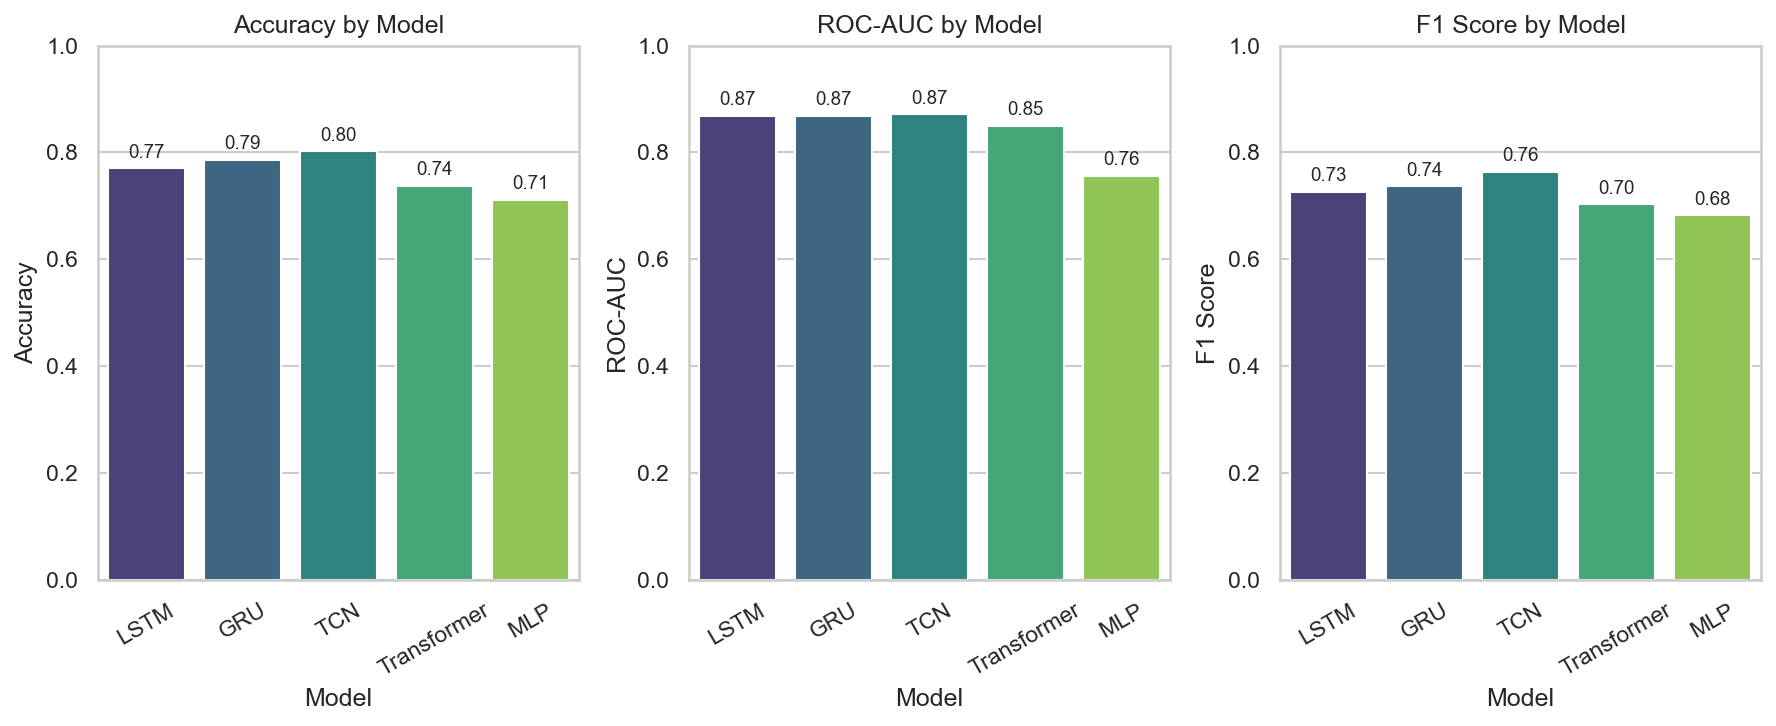

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set style
sns.set(style="whitegrid")

# Plot 1: Accuracy, AUC, F1 comparison
metrics = ["Accuracy", "ROC-AUC", "F1 Score"]

plt.figure(figsize=(12, 5), dpi=150)
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.ylim(0, 1)
    plt.title(f"{metric} by Model")
    plt.xticks(rotation=30)
    for j, val in enumerate(results_df[metric]):
        plt.text(j, val + 0.02, f"{val:.2f}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()